In [1]:
%matplotlib inline
import xarray as xr
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os, datetime
print('Last updated on {}'.format(datetime.datetime.now().ctime()))

Last updated on Fri Jul 29 11:06:19 2022


In [2]:
sns.set_theme(context='notebook', style='ticks', palette='tab10', rc={'figure.dpi':100, 'figure.figsize':[5, 5], 'axes.grid':True})

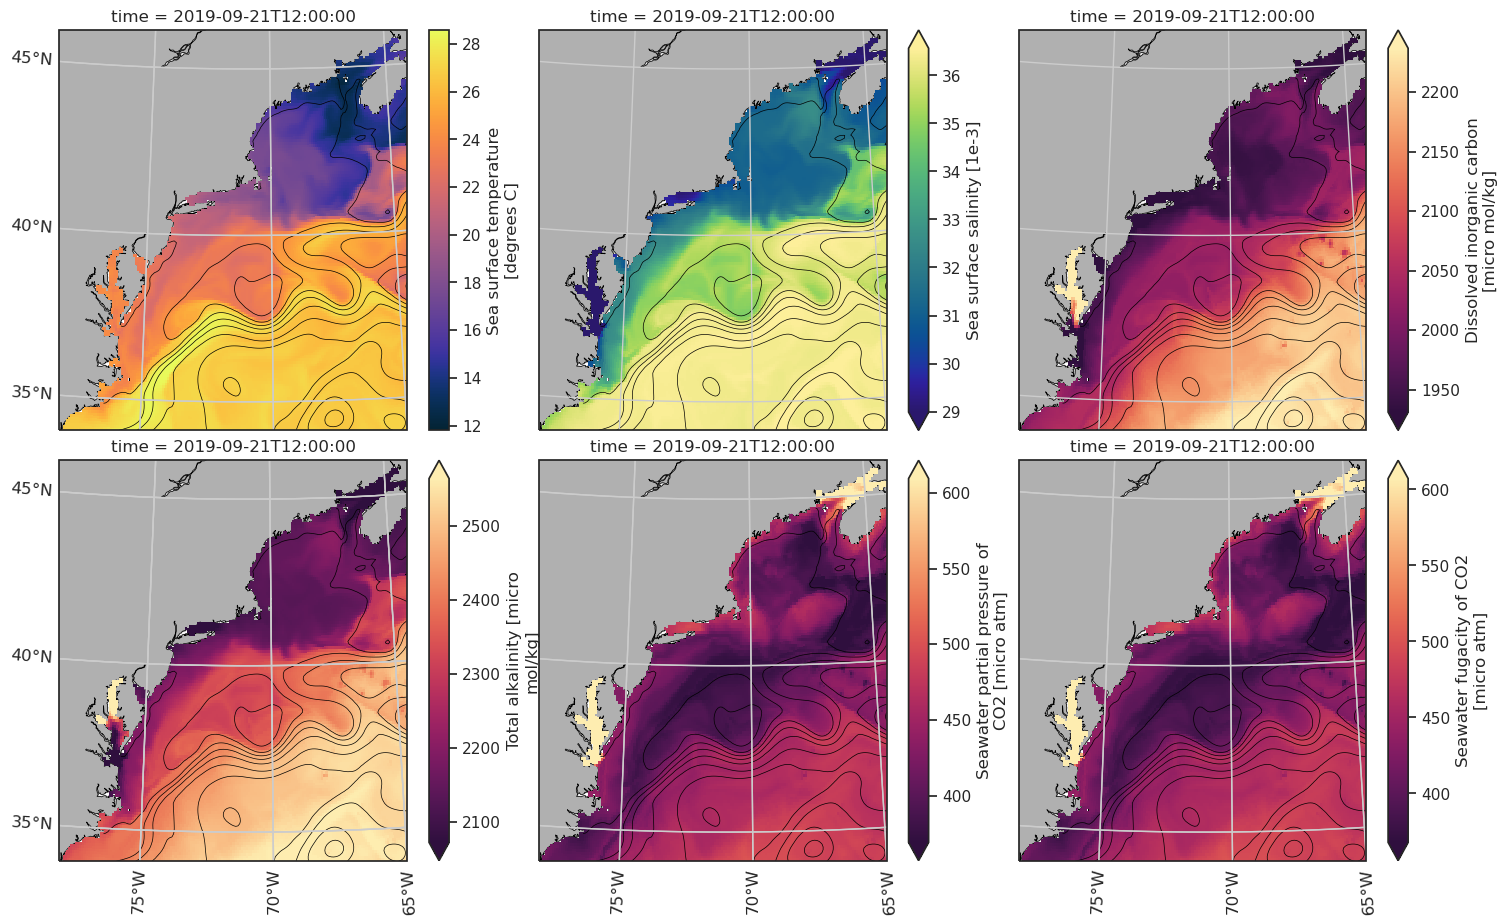

In [3]:
from cartopy import crs as ccrs
from cartopy import feature as cfeature
import cmocean

ds = xr.open_dataset('/bali/data/ilima/GLORYS12V1/daily/BGC/surface/GLORYS12V1_NW_Atlantic_2019_surf_pCO2.nc')
ds_phys = xr.open_dataset('/bali/data/ilima/GLORYS12V1/daily/GLORYS12V1_NW_Atlantic_2019_daily.nc')

minlon, maxlon = ds.longitude.min().values, ds.longitude.max().values
minlat, maxlat =  ds.latitude.min().values, ds.latitude.max().values
lonc, latc = (minlon + maxlon)/2., (minlat + maxlat)/2.

proj = ccrs.EquidistantConic(central_longitude=lonc, central_latitude=latc)
cmaps = {'SST': cmocean.cm.thermal, 'SSS': cmocean.cm.haline}
dpi = 300

t = '2019-09-21T12:00:00.000000000'
fig, axs = plt.subplots(2, 3, sharex=True, sharey=True, subplot_kw={'projection':proj}, figsize=(18, 11))
fig.subplots_adjust(wspace=0.1, hspace=0.075)
for vname, ax in zip(ds.data_vars, axs.ravel()):
    _ = ax.set_extent([minlon, maxlon-1, minlat, maxlat])
    _ = ax.add_feature(cfeature.LAND, zorder=1, facecolor='#b0b0b0')
    _ = ax.coastlines(linewidth=0.5, zorder=1)
    _ = ax.gridlines(xlocs=np.arange(-180,180,5),ylocs=np.arange(0,90,5), draw_labels=False)
    if vname == 'SST':
        robust = False
    else:
        robust = True

    ds[vname].sel(time=t).plot(transform=ccrs.PlateCarree(), ax=ax, robust=robust,
                               cmap=cmaps.get(vname, cmocean.cm.matter_r))
    ds_phys.zos.sel(time=t).plot.contour(levels=10, colors='k', linewidths=0.5, transform=ccrs.PlateCarree(), ax=ax)

for ax in axs[:,0]:
    _ = ax.gridlines(xlocs=np.arange(-180,180,5), ylocs=np.arange(0,90,5), draw_labels={'left': 'y'})

for ax in axs[-1,:]:
    _ = ax.gridlines(xlocs=np.arange(-180,180,5), ylocs=np.arange(0,90,5), draw_labels={'bottom': 'x'})

fig.savefig('figures/glorys12v1_oae.png', dpi=dpi, bbox_inches='tight')

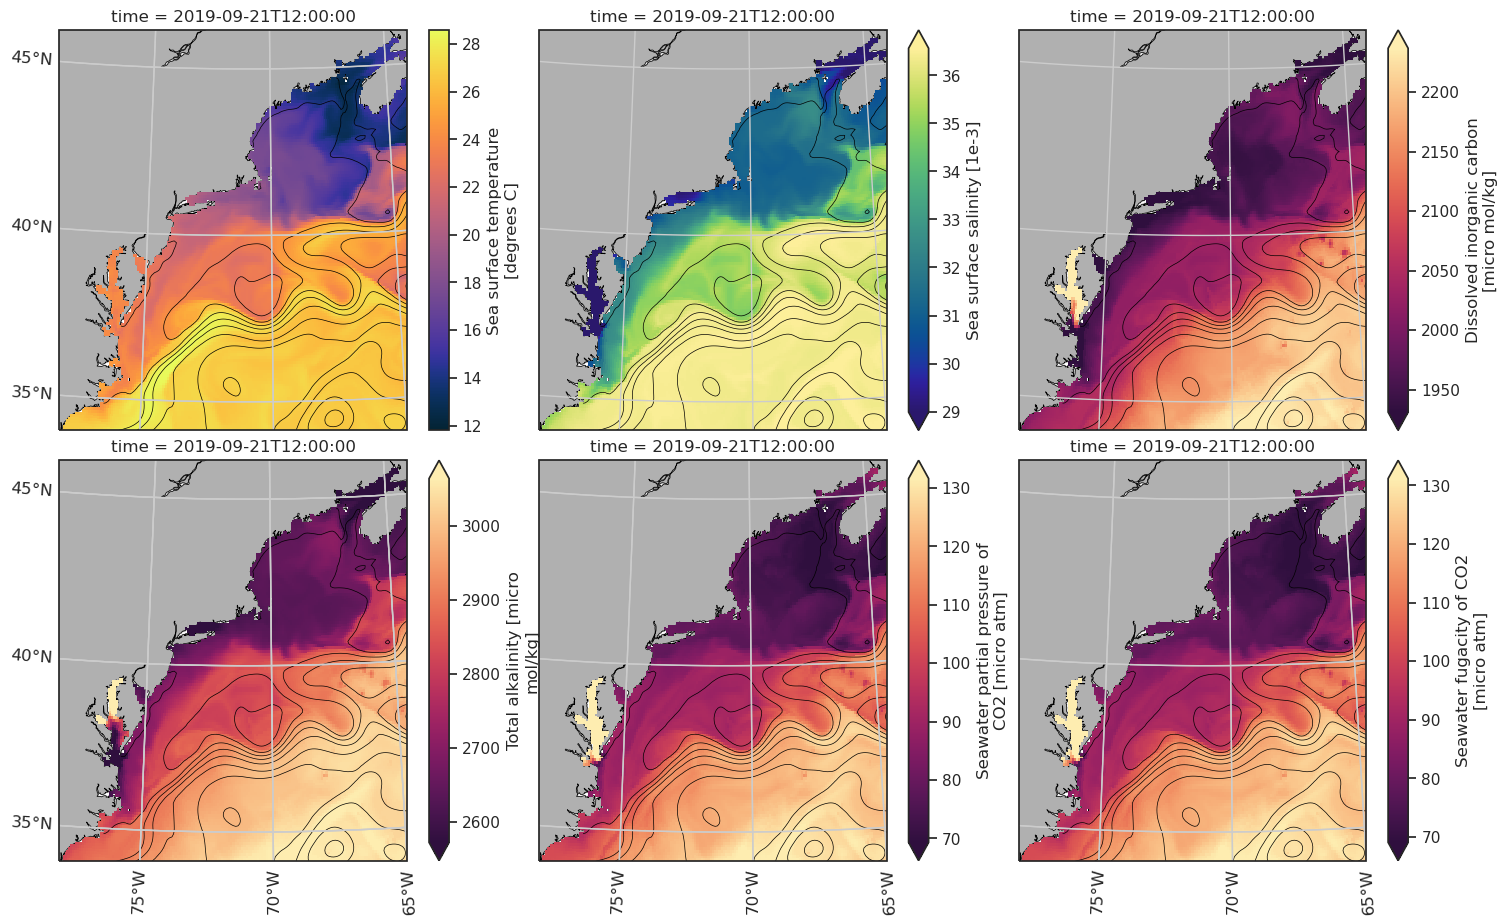

In [4]:
ds = xr.open_dataset('/bali/data/ilima/GLORYS12V1/daily/BGC/surface/TA_500/GLORYS12V1_NW_Atlantic_2019_surf_OAE_TA500.nc')

fig, axs = plt.subplots(2, 3, sharex=True, sharey=True, subplot_kw={'projection':proj}, figsize=(18, 11))
fig.subplots_adjust(wspace=0.1, hspace=0.075)
for vname, ax in zip(ds.data_vars, axs.ravel()):
    _ = ax.set_extent([minlon, maxlon-1, minlat, maxlat])
    _ = ax.add_feature(cfeature.LAND, zorder=1, facecolor='#b0b0b0')
    _ = ax.coastlines(linewidth=0.5, zorder=1)
    _ = ax.gridlines(xlocs=np.arange(-180,180,5),ylocs=np.arange(0,90,5), draw_labels=False)
    if vname == 'SST':
        robust = False
    else:
        robust = True

    ds[vname].sel(time=t).plot(transform=ccrs.PlateCarree(), ax=ax, robust=robust,
                               cmap=cmaps.get(vname, cmocean.cm.matter_r))
    ds_phys.zos.sel(time=t).plot.contour(levels=10, colors='k', linewidths=0.5, transform=ccrs.PlateCarree(), ax=ax)

for ax in axs[:,0]:
    _ = ax.gridlines(xlocs=np.arange(-180,180,5), ylocs=np.arange(0,90,5), draw_labels={'left': 'y'})

for ax in axs[-1,:]:
    _ = ax.gridlines(xlocs=np.arange(-180,180,5), ylocs=np.arange(0,90,5), draw_labels={'bottom': 'x'})

fig.savefig('figures/glorys12v1_oae_ta500.png', dpi=dpi, bbox_inches='tight')